# Project Overwiev

## Bellabeat

is the high-tech wellness company. Sando Mur and Urška Sršen created smart-devices to monitor biometric and lifestyle data that help women better understand how their bodies work and make healthier choices. Bellabeat devices not only support healthy lifestyle but also are beautiful jewellery designed by artist and co-founder of Bellabeat - Urška.

# Ask

### Key business task and questions for the analysis:

Gain more insight into behavior of non-Bellabeat smart-devices users to find new opportunities to develop device or improve marketing strategy.

To address key business task my analyze will answer questions below:

1.  What are some trends in smart device usage?
2.  How could these trends apply to Bellabeat customers?
3.  How could these trends help influence Bellabeat marketing strategy?

# Prepare

### Used data sources:

[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (author Mobius) from Kaggle data set. Data license is [CC0: Public Domain](https://wiki.creativecommons.org/wiki/CC0_use_for_data), which means there is no copyright. Data can be copied, modified and distributed.

Installing and loading packages

In [1]:
install.packages('tidyverse')
install.packages('lubridate')
install.packages('janitor')
install.packages('reshape')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(lubridate)
library(janitor)
library(reshape)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘reshape’


The following object is masked from ‘package:lubridate’:

    stamp


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths




In [3]:
activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
sleep <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
intensity <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
weight <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set 

# Process (Data Cleaning)

### Tools used:

R for data cleaning, Tableau for visualization

### Data inspecting
I have imported 5 datasets: acitivty, calories, intensity, sleep and weight. Each dataset contains data collected by wellness smart-devices.
View first 10 rows of each dataset to get familiar with structure of table, variable names convention, data types set in columns and looking for NA values.


***Activity*** **dataset**

Activity dataset contains observations about total steps, distance (with distinction between intensity of training), minutes of training (with distinction between intensity as well), includes also calories burned by users in each day.

In [4]:
head(activity,10)
str(activity)

any(is.na.data.frame(activity))

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 22

[1] FALSE

Formatting datatype in column ActivityDate (from *char* to *datetime*)


In [5]:
activity$ActivityDate <- as.POSIXct(activity$ActivityDate, format = '%m/%d/%Y', tz=Sys.timezone())

***Calories*** **dataset**


Calories dataset contains observation about calories burned by users in each day.

In [6]:
head(calories, 10)
str(calories)

any(is.na(calories))

Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728
1503960366,4/18/2016,1921
1503960366,4/19/2016,2035
1503960366,4/20/2016,1786


spec_tbl_df [940 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id         : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories   : num [1:940] 1985 1797 1776 1745 1863 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityDay = col_character(),
  ..   Calories = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


[1] FALSE

Formatting datatype in column ActivityDay (from *char* to *datetime*)


In [7]:
calories$ActivityDay <- as.POSIXct(calories$ActivityDay, format = '%m/%d/%Y', tz=Sys.timezone())

***Intensity* dataset**

In this dataset observation about intensity of each training are stored. Minutes and kilometers of training.

In [8]:
head(intensity)
str(intensity)
any(is.na(intensity))

Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


spec_tbl_df [940 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ SedentaryMinutes        : num [1:940] 728 776 1218 726 773 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 164 233 264 205 211 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityDay = col_character(),
  ..   SedentaryMinutes = col_double(),
  ..   LightlyActiveMinutes = col_double(),
  ..  

[1] FALSE

Formating ActivityDay type (from *char* to *datetime*)

In [9]:
intensity$ActivityDay <- as.POSIXct(intensity$ActivityDay, format = '%m/%d/%Y', tz=Sys.timezone())

***Sleep*** **dataset**

This dataset contains information about sleep duration and and minutes spend in bed.

In [10]:
head(sleep)
str(sleep)
any(is.na(sleep))

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


spec_tbl_df [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


[1] FALSE

Formatting SleepDay type (from *char* to *datetime*)

In [11]:
sleep$SleepDay <- as.POSIXct(sleep$SleepDay, format = '%m/%d/%Y', tz=Sys.timezone())

***Weight* dataset**

Weight dataset stores information about weight, bmi and fat percentage of each user.

In [12]:
head(weight)
str(weight)
sum(is.na(weight))

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


spec_tbl_df [67 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id            : num [1:67] 1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr [1:67] "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num [1:67] 52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num [1:67] 116 116 294 125 126 ...
 $ Fat           : num [1:67] 22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num [1:67] 22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: logi [1:67] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ LogId         : num [1:67] 1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   Date = col_character(),
  ..   WeightKg = col_double(),
  ..   WeightPounds = col_double(),
  ..   Fat = col_double(),
  ..   BMI = col_double(),
  ..   IsManualReport = col_logical(),
  ..   LogId = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


[1] 65

As in *weight* data set there are 65 NA values, I have take into consideration if this amount of missing values can be removed, replaced etc.

Formatting Date type (from *char* to *datetime*)

In [13]:
weight$Date <- as.POSIXct(weight$Date, format = '%m/%d/%Y %I:%M:%S %p', tz=Sys.timezone())

### Exploring and summarizing data

Counting unique users in each dataset

In [14]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensity$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

There is 33 participants in activity, calories and intensity datasets. 24 in sleep and only 8 participants in weight dataset.
8 is not significant to make any recomendations based on this amount of data and due to this, there is no need to analyze how to address 65 missing values of this dataset.

Searching for duplicates in each dataset

In [15]:
sum(duplicated(activity))
sum(duplicated(calories))
sum(duplicated(intensity))
sum(duplicated(sleep))
sum(duplicated(weight))

[1] 0

[1] 0

[1] 0

[1] 3

[1] 0

Cleaning duplicates

In [16]:
activity <- activity %>% 
  distinct() 

calories <- calories %>% 
  distinct()

intensity <- intensity %>%
    distinct()

sleep <- sleep %>% 
  distinct()

weight <- weight %>%
    distinct()

Verification

In [17]:
sum(duplicated(activity))
sum(duplicated(calories))
sum(duplicated(intensity))
sum(duplicated(sleep))
sum(duplicated(weight))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

Column names cleaning to get consistency in variables and renaming column in activity data

In [18]:
activity <- clean_names(activity)
calories <- clean_names(calories)
intensity <- clean_names(intensity)
sleep <- clean_names(sleep)
weight <- clean_names(weight)

activity <- activity %>% 
  dplyr::rename(activity_day = activity_date)
sleep <- sleep %>%
    dplyr::rename(activity_day = sleep_day)


Summary of each dataset

In [19]:
activity %>% 
  select(id, total_steps, total_distance, sedentary_minutes) %>% 
  summary()

calories %>% 
  select( calories) %>% 
  summary()

intensity %>%
    select(sedentary_minutes, lightly_active_minutes, fairly_active_minutes, very_active_minutes) %>%
    summary()

sleep %>% 
  select(total_sleep_records, total_minutes_asleep, total_time_in_bed) %>% 
  summary()

       id             total_steps    total_distance   sedentary_minutes
 Min.   :1.504e+09   Min.   :    0   Min.   : 0.000   Min.   :   0.0   
 1st Qu.:2.320e+09   1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   
 Median :4.445e+09   Median : 7406   Median : 5.245   Median :1057.5   
 Mean   :4.855e+09   Mean   : 7638   Mean   : 5.490   Mean   : 991.2   
 3rd Qu.:6.962e+09   3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   
 Max.   :8.878e+09   Max.   :36019   Max.   :28.030   Max.   :1440.0   

    calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

 sedentary_minutes lightly_active_minutes fairly_active_minutes
 Min.   :   0.0    Min.   :  0.0          Min.   :  0.00       
 1st Qu.: 729.8    1st Qu.:127.0          1st Qu.:  0.00       
 Median :1057.5    Median :199.0          Median :  6.00       
 Mean   : 991.2    Mean   :192.8          Mean   : 13.56       
 3rd Qu.:1229.5    3rd Qu.:264.0          3rd Qu.: 19.00       
 Max.   :1440.0    Max.   :518.0          Max.   :143.00       
 very_active_minutes
 Min.   :  0.00     
 1st Qu.:  0.00     
 Median :  4.00     
 Mean   : 21.16     
 3rd Qu.: 32.00     
 Max.   :210.00     

 total_sleep_records total_minutes_asleep total_time_in_bed
 Min.   :1.00        Min.   : 58.0        Min.   : 61.0    
 1st Qu.:1.00        1st Qu.:361.0        1st Qu.:403.8    
 Median :1.00        Median :432.5        Median :463.0    
 Mean   :1.12        Mean   :419.2        Mean   :458.5    
 3rd Qu.:1.00        3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :3.00        Max.   :796.0        Max.   :961.0    

Some interesing findings about each dataset summary:
* average total steps - 7868. Not enough to maintain good health. According to WHO people who make more than 8000 steps per day have 51% lower risk of dying by any cause compared with those who took 4,000 per day. This trend continued with higher step counts, as participants who took 12,000 steps per day had a 65% lower risk of dying than those who took 4,000.
* sedentary minutes are majority of tracked time (in compare to lightly active, fairly active and very active minutes) - average 1026 miutes -> over 17 hours. Definately this amount should be lowered.
* on average participiants sleep 1 to 7 hours.

# Analyze

At first, I have analyzed and categorized users by frequency of usage. Datasets contain information collected in two months April-May 2016. <br> That is why I set that 20 or more logged trainings qualifiy user as very active, between 20 and 10 trainings as active user, less than 10 - occasional user.

In [20]:
activity_by_id <- activity %>% 
    group_by(id) %>%
    count(id)

activity_by_id <- activity_by_id %>% mutate(user_category = case_when(
        n >= 25 ~ 'very_active_user',
        n >= 10 ~ 'active_user',
        n < 10 ~ 'occasional_user'))

activity <- merge(x=activity, y=activity_by_id[ , c("id", "n", "user_category")], by='id')


In [21]:
head(activity)

,id,activity_day,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,n,user_category
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,31,very_active_user
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,31,very_active_user
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,31,very_active_user
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,31,very_active_user
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,31,very_active_user
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,31,very_active_user


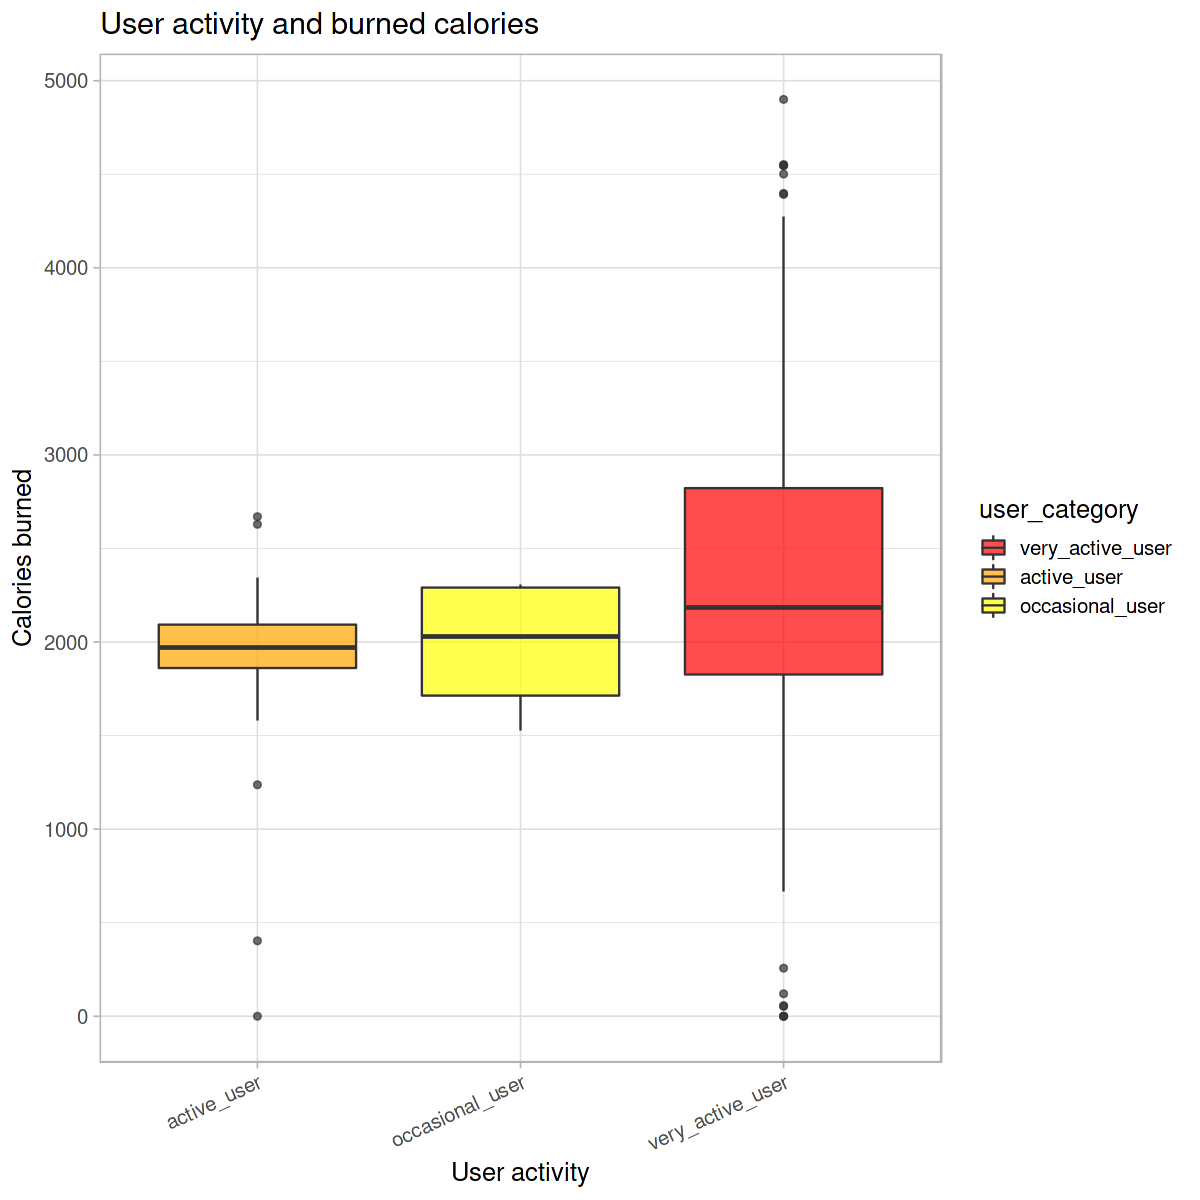

In [22]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(data=activity)+
    geom_boxplot(aes(x=user_category, y=calories, fill=user_category), alpha=0.7)+
        theme_light(base_size=15)+
        guides(x =  guide_axis(angle = 25)) +
        labs(x="User activity", y="Calories burned", title="User activity and burned calories")+
        scale_fill_manual(values=c("very_active_user"="red","active_user"="orange","occasional_user"="yellow"))

Chart above shows that most active users burn on average more calories than other users. This is what could be expected - more recorded trainings result with more calories burned. <br>
**Bellabeat can consider implementing challenge-like feature, ranking dependent on amount of trainings or training days strike. Fun competition can be motivation to increase users activity.**

Next, I analyzed distribution of total steps recorded. Right amount of steps made during daily life can help to maintain good health.
Nowadays more and more people have sedentary live style, works in front of computers and it is getting harder to reach steps goal. This is why devices that helps to monitor steps amount will be more and more popular.

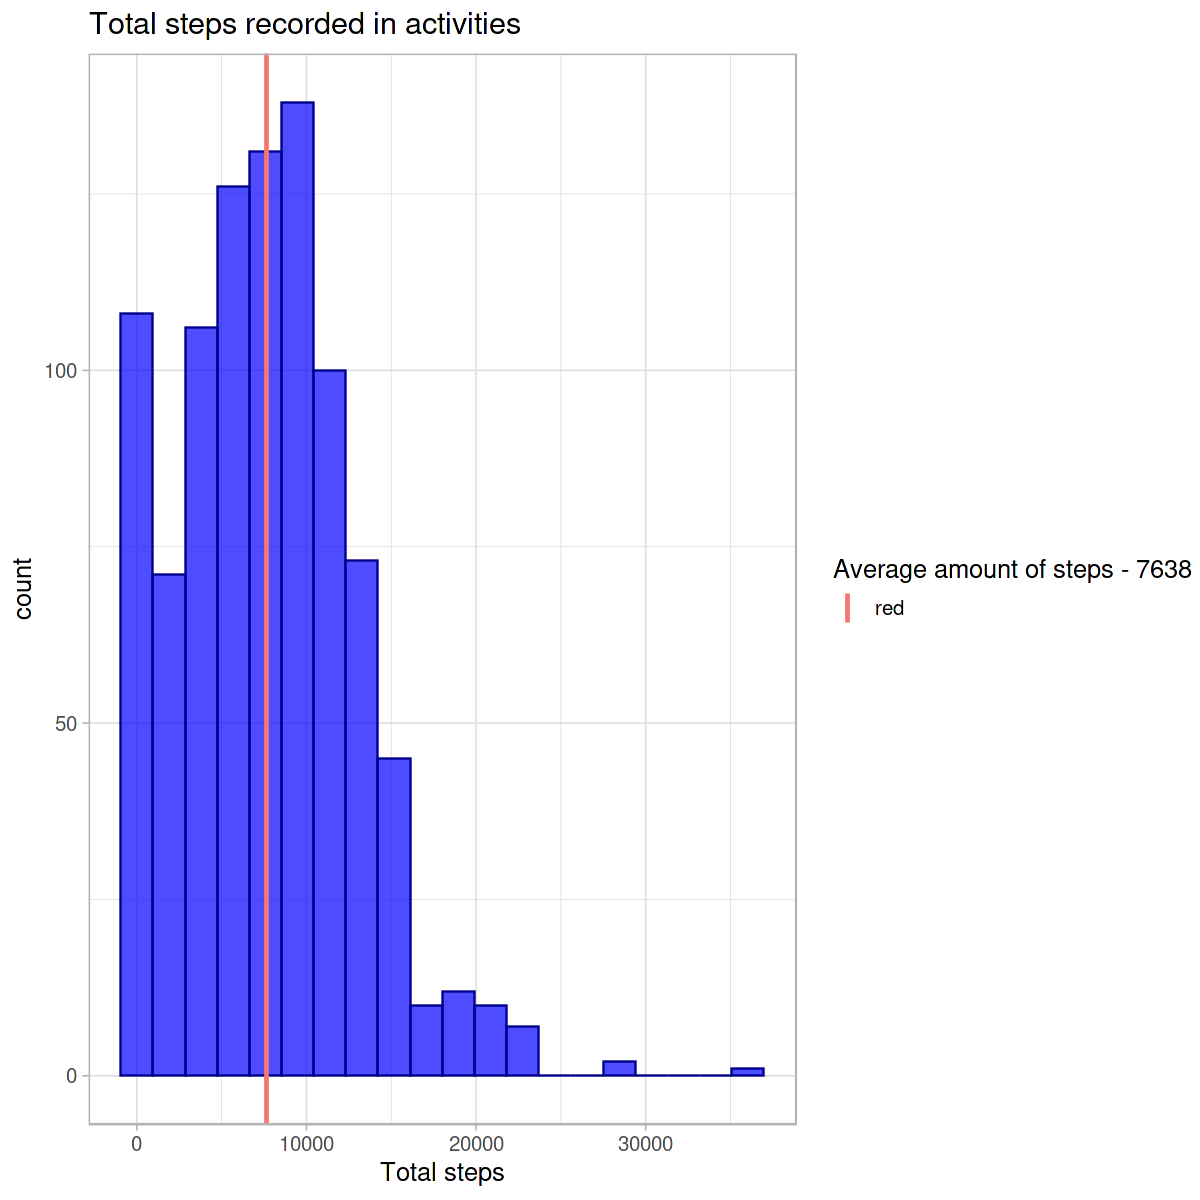

In [23]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(data=activity, aes(x=total_steps))+
    geom_histogram(bins = 20, color='darkblue', fill='blue', alpha=0.7)+
    geom_vline(data=activity, aes(xintercept=mean(total_steps), color='red'), size=1)+
    theme_light(base_size=15) +
    labs(color = "Average amount of steps - 7638", x= "Total steps", title="Total steps recorded in activities")


We can observe that the majority of observations lay between 0 an 10000 steps per day. But distribution is slightly right-skewed, which means most of the records are lower than average (7638 steps per day). Each participant should pay attention to make at least 8000 steps per day. <br>
**Bellabeat can consider implementing feature where user can set steps goal and get alerted how many steps have been made and how many left to reach daily goal, in chosen interval (f.eg every two hours).**

Next analyze reveals if users that are making more steps during the day are burning more calories.

In [24]:
round(cor(activity$calories, activity$total_steps, method="pearson"),2)

[1] 0.59

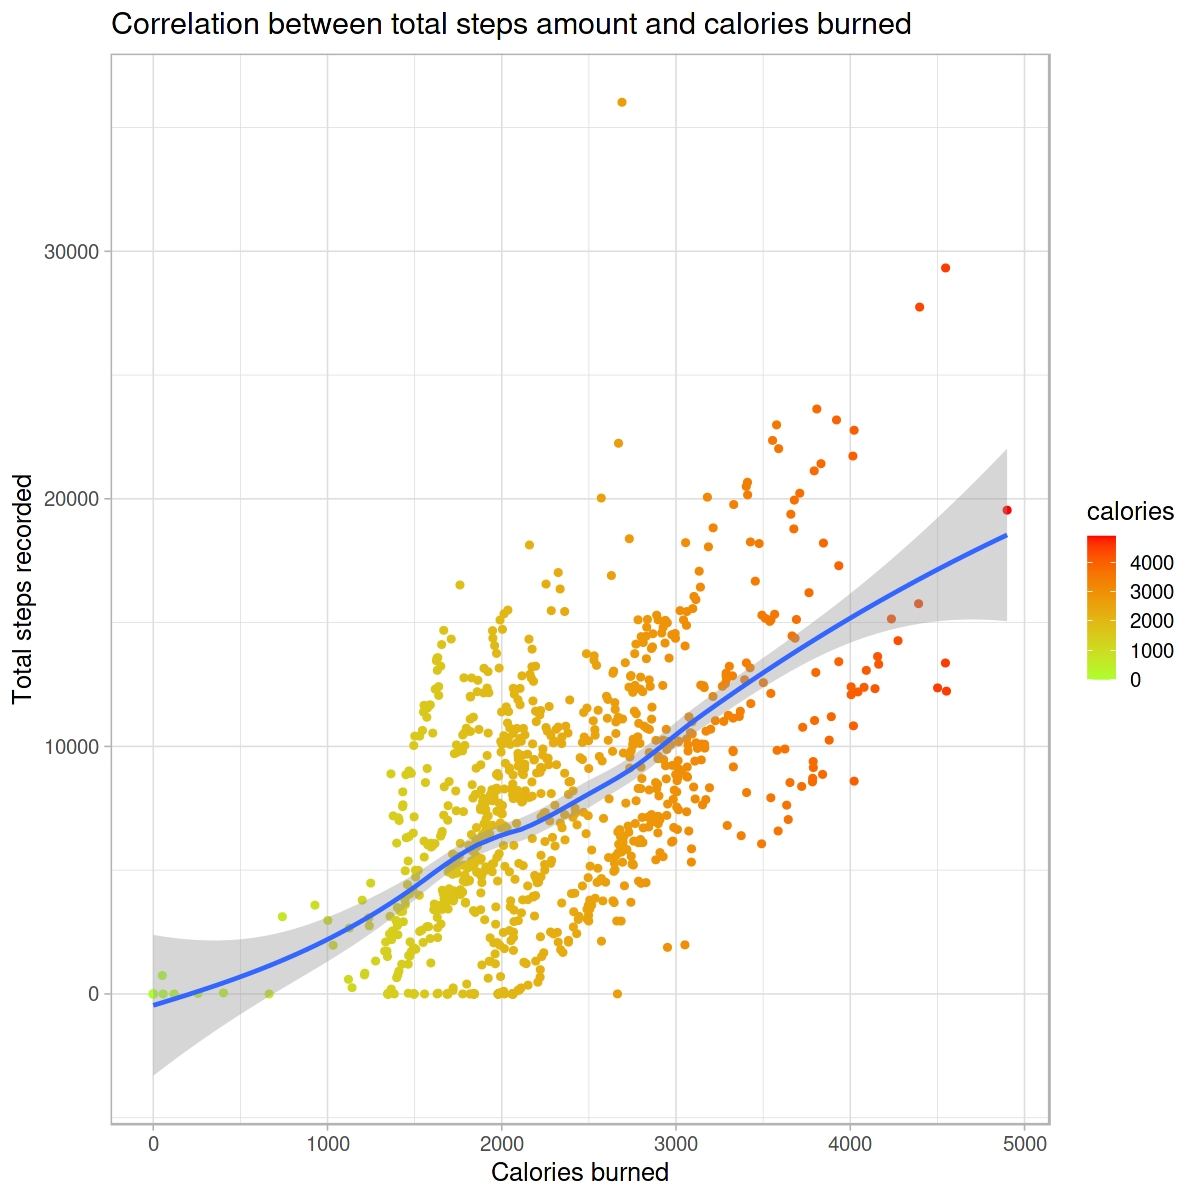

In [25]:
options(repr.plot.widht=10, repr.plot.height=10)

ggplot(data=activity, aes(x=calories, y=total_steps, color=calories))+
    geom_point()+
    geom_smooth(method = 'loess', formula = y ~ x)+
    theme_light(base_size=15)+
    scale_color_gradient(low='#ADFF2F', high='#FF0000')+
    labs(x='Calories burned', y='Total steps recorded', title='Correlation between total steps amount and calories burned')

Corelation between burned calories and total steps equals 0.59. Which means that there is a moderate linear dependency between these two variables.<br>
We can conclude, that users burning calories during various kinds of acitvities - not only by walkich/jogging. Could be pilates, joga, gym activities.<br>
**Bellabeat can consider extension number of available activities that can be recorded as training.**

To verify if more active day (more minutes spent on activities) is correlated with more minutes spent on sleeping I merged *activity* and *sleep* datasets and created new column *activity_minutes* (sum of every activity minutes recorded on particular day).

In [26]:
activity_sleep_merged <- merge(activity, sleep, by=c('id', 'activity_day')) %>% mutate(activity_minutes=very_active_minutes+fairly_active_minutes+lightly_active_minutes)
head(activity_sleep_merged)

,id,activity_day,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,⋯,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,n,user_category,total_sleep_records,total_minutes_asleep,total_time_in_bed,activity_minutes
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,13,328,728,1985,31,very_active_user,1,327,346,366
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,19,217,776,1797,31,very_active_user,2,384,407,257
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,34,209,726,1745,31,very_active_user,1,412,442,272
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,10,221,773,1863,31,very_active_user,2,340,367,267
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,20,164,539,1728,31,very_active_user,1,700,712,222
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,31,264,775,2035,31,very_active_user,1,304,320,345


In [27]:
round(cor(activity_sleep_merged$total_minutes_asleep, activity_sleep_merged$activity_minutes, method="pearson"),2)

[1] -0.07

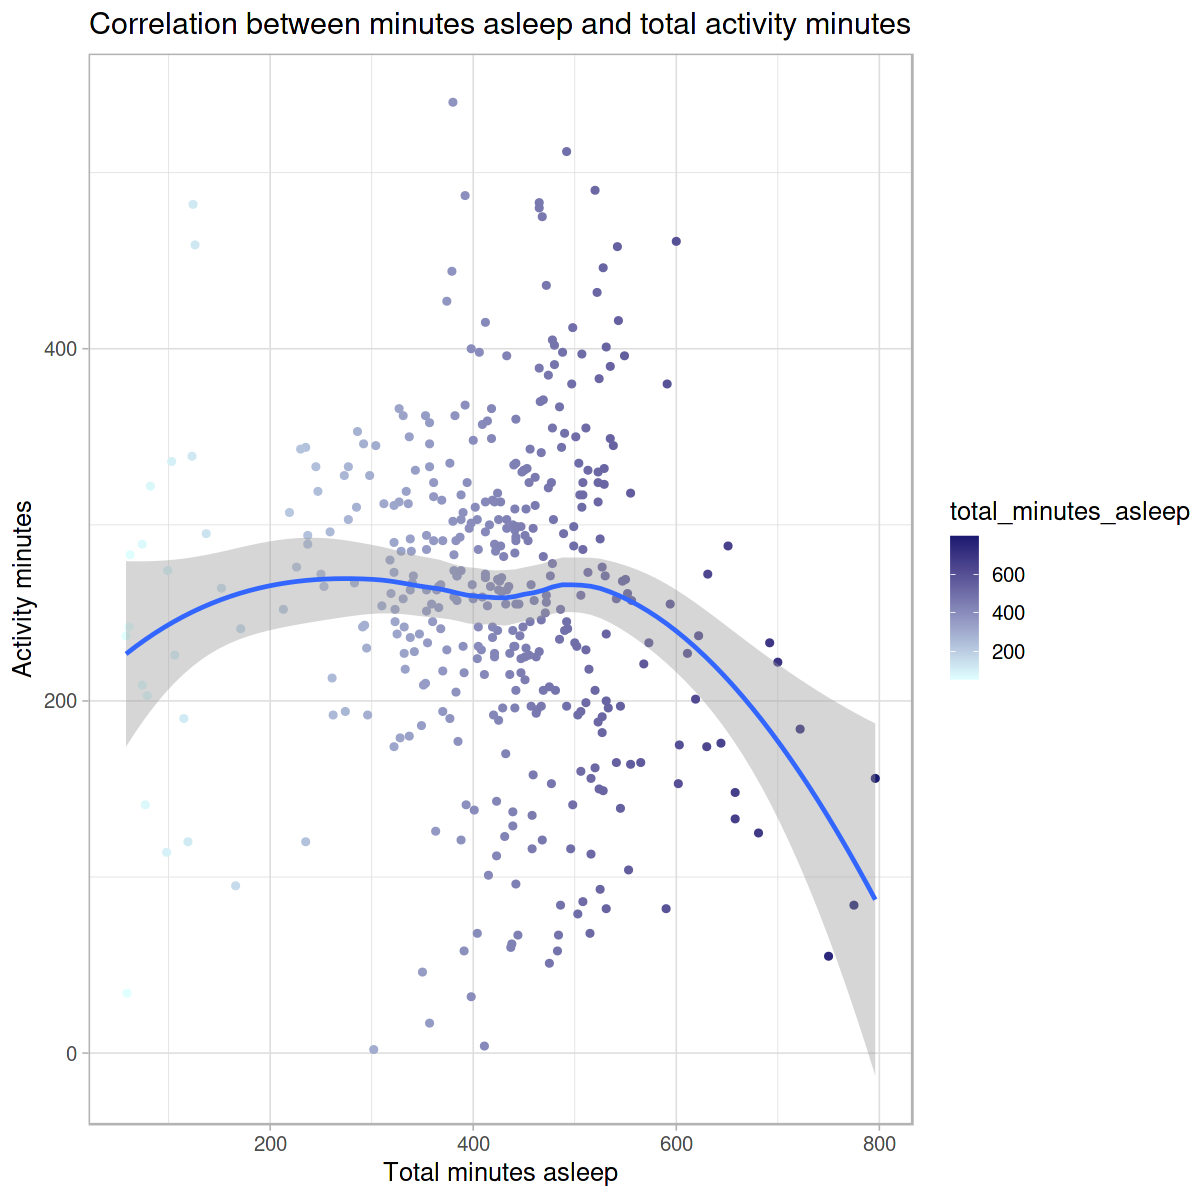

In [28]:
options(repr.plot.widht=10, repr.plot.height=10)

ggplot(data=activity_sleep_merged, aes(x=total_minutes_asleep, y=activity_minutes, color=total_minutes_asleep))+
    geom_point()+
    geom_smooth(method = 'loess', formula = y ~ x)+
    theme_light(base_size=15)+
    scale_color_gradient(low='#E0FFFF', high='#191970')+
    labs(x='Total minutes asleep', y='Activity minutes', title='Correlation between minutes asleep and total activity minutes')

Graph above shows that there is no correlation between minutes spent on activities and time asleep. Correlation value -0.07 is not significant.<br>
Right amount of high quality sleep is significant factor of health, to improve this area of users life, **Bellabeat can consider implementing feature that lets user track amount of sleep, quality of it and set sleeping schedule defined by user.**

# Summary

Bellabeat supports women in maintainig healthy lifestyle. Regular analyzing trends among smart-devices users is crucial to be up to date to follow company mission and answer users needs in best possible way.
Nowadays smart devices gain more and more popularity - busy schedules and healthy habits don't have to be mutually exclusive. 
Bellabeat is like a friend who keeps you motivated, on track and is stylish.

* Majority of users do some light activity to stay healthy and in shape, **Bellabeat can encourage them to train more frequently or more efficiently by implementing challenge-like feature, ranking dependent on amount of trainings or training days strike. Fun competition can be motivation to increase users activity.**
* Average user does 7638 steps per day - it is a bit too low. WHO recommends taking between 8000-12000 stes per day. **Bellabeat can consider implementing feature where user can set daily steps goal and get alerted how many steps have been made and how many left to reach goal, in chosen interval (f.eg every two hours).**
* Uers burning calories during various kinds of acitvities - not only by walkich/jogging. Could be pilates, joga, gym activities, swimming. **Extension of number available activities that can be recorded as training will improve user-experience and encourage users to record more trainings.**
* To take care about user wellness **Bellabeat can consider implementing feature that lets user track amount of sleep, quality of it and set sleeping schedule defined by user.** Right amount of high quality sleep is significant factor of health, to improve this area of users life, 



This is my first project using R. I would appreciate any comments and recommendations for improvement!